### Introduction

Supply chain management is an essential component of e-commerce. Supply chain management in e-commerce focusses on procurement of raw material, manufacturing, and distribution of the right product at the right time. It includes managing supply and demand, warehousing, inventory tracking, order entry, order management, distribution and delivery to the customer. E-commerce is about selling and buying goods over the internet and the movement of goods between two parties. The dispatch of right quantity products at the right time to the right person is essential and hence efficient supply chain is required. A quick, uninterrupted and secure supply chain is a critical aspect of the e-commerce business. Efficient supply chain management in e-commerce can reduce costs and enhance cash utilization. When a customer purchases a product from an e-commerce website, he/she wants the product in a short time. New e-commerce websites are evolving every day.  But, customers prefer only those sites that have an efficient supply chain to deliver the right products at the right time. Now all the comapnies are collecting huge amount of data in real time by using IoT sensors. This data when used correctly, will be very helpful to the company to discover hidden patterns for better decision making in the future. This is the dataset of Supply Chains used by the company DataCo Global which includes a collection of their products sold, financial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details.

### Problem Statement

- Customer segmentation analysis was performed which helps the company to better understand its customers and target them to increase customer responsiveness and the company's revenue.
- Building a Machine Learning model for detection of fraud transactions, late delivery orders, sales revenue and quantity of     products which customer orders.
- The classifier models used for fraud detection and to predict late delivery.
- The regression models used for predicting sales and quantity of the products required.


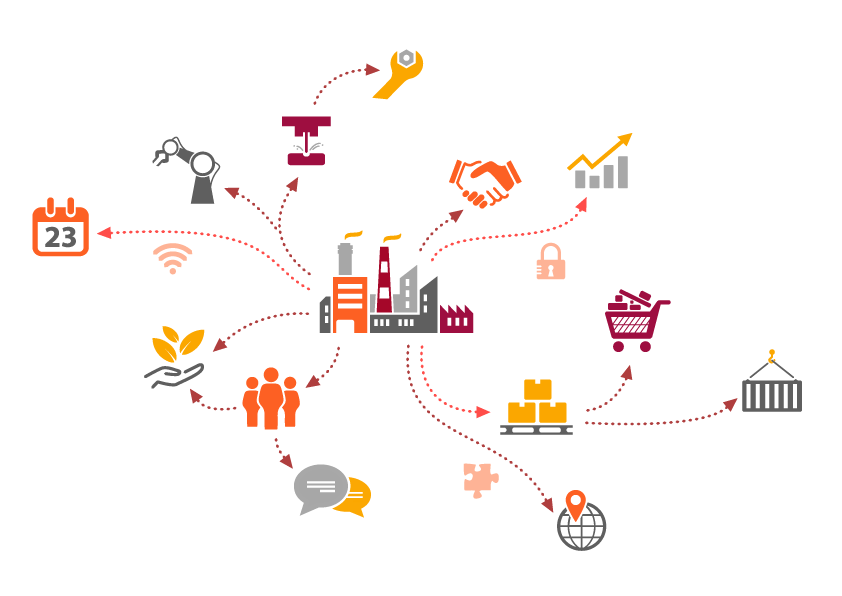 
                         Source:lokad

In [1]:
# Data analysis and wrangling
import pandas as pd    # File read & write operation
import numpy as np     # Linear algebra

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
import datetime as dt

# Machine Learning 
import sklearn
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn import tree
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,recall_score,f1_score,roc_curve, auc

from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge


In [2]:
data=pd.read_csv('DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
data.shape

(180519, 53)

In [5]:
def missing_value_percentage(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=(total/len(data))*100
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [6]:
missing_value_percentage(data)

,Total,Percentage
Product Description,180519,100.000000
Order Zipcode,155679,86.239676
Customer Lname,8,0.004432
Customer Zipcode,3,0.001662
Shipping Mode,0,0.000000
Customer Fname,0,0.000000
Latitude,0,0.000000
Department Name,0,0.000000
Department Id,0,0.000000
Customer Street,0,0.000000


Four features having missing values in the data in which two features are having more than 85% of missing values. We are going to remove these two along with some other unimportant features in below steps.

In [7]:
data['Customer Full Name']=data['Customer Fname'].astype(str)+data['Customer Lname'].astype(str)
data['Customer Full Name']

0            CallyHolloway
1                IreneLuna
2         GillianMaldonado
3                 TanaTate
4            OrliHendricks
                ...       
180514       MariaPeterson
180515         RonaldClark
180516           JohnSmith
180517           MarySmith
180518        AndreaOrtega
Name: Customer Full Name, Length: 180519, dtype: object

In [8]:
data.drop(['Customer Password','Customer Email','Product Description','Order Zipcode','Customer Fname','Customer Lname','Product Status','shipping date (DateOrders)'],axis=1,inplace=True)

In [9]:
data.dropna(subset=['Customer Zipcode'],inplace=True)

In [10]:
missing_value_percentage(data)

,Total,Percentage
Customer Full Name,0,0.0
Customer Id,0,0.0
Market,0,0.0
Longitude,0,0.0
Latitude,0,0.0
Department Name,0,0.0
Department Id,0,0.0
Customer Zipcode,0,0.0
Customer Street,0,0.0
Customer State,0,0.0


In [11]:
data.dtypes.value_counts()

object     20
float64    13
int64      13
dtype: int64

In [12]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,Standard Class,OrliHendricks


In [13]:
data.select_dtypes(include=['object']).dtypes

Type                       object
Delivery Status            object
Category Name              object
Customer City              object
Customer Country           object
Customer Segment           object
Customer State             object
Customer Street            object
Department Name            object
Market                     object
Order City                 object
Order Country              object
order date (DateOrders)    object
Order Region               object
Order State                object
Order Status               object
Product Image              object
Product Name               object
Shipping Mode              object
Customer Full Name         object
dtype: object

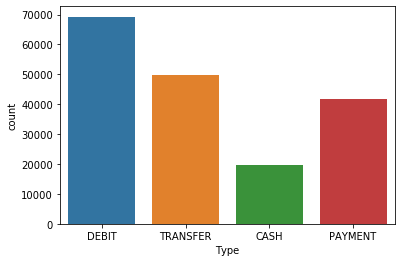

In [14]:
sns.countplot(x='Type',data=data) #Transaction type

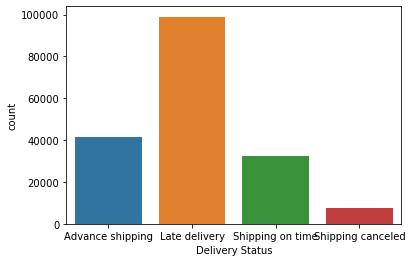

In [15]:
sns.countplot(x='Delivery Status',data=data) #Delivery status

In [16]:
data['Category Name'].unique() # Different categories of product

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [17]:
data['Customer City'].unique()

array(['Caguas', 'San Jose', 'Los Angeles', 'Tonawanda', 'Miami',
       'San Ramon', 'Freeport', 'Salinas', 'Peabody', 'Canovanas',
       'Paramount', 'Mount Prospect', 'Long Beach', 'Rancho Cordova',
       'Billings', 'Wilkes Barre', 'Roseville', 'Bellflower', 'Wheaton',
       'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Panorama City',
       'Atlanta', 'Fremont', 'Rochester', 'Bayamon', 'Guayama',
       'Juana Diaz', 'Fort Washington', 'Bakersfield', 'Corona',
       'Cincinnati', 'Germantown', 'Carrollton', 'Houston', 'Ewa Beach',
       'Lakewood', 'Rome', 'Vista', 'Fort Worth', 'Fond Du Lac',
       'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Honolulu',
       'Oceanside', 'North Tonawanda', 'Clovis', 'Jamaica',
       'Granite City', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York',
       'Aurora', 'Simi Valley', 'Silver Spring', 'Saint Paul',
       'San Antonio', 'Bronx', 'Greenville', 'Morristown', 'San Diego',
       'Oxnard', 'Albuquerque', 'Amarillo', 'Lutz', 'B

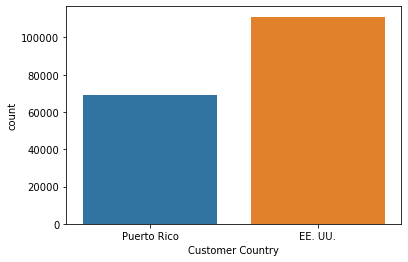

In [18]:
sns.countplot(x='Customer Country',data=data)

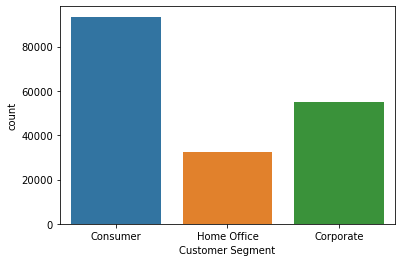

In [19]:
sns.countplot(x='Customer Segment',data=data)

In [20]:
data['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS', 'AR', 'OK', 'AL', 'IA'],
      dtype=object)

In [21]:
data['Customer Street'].unique()

array(['5365 Noble Nectar Island', '2679 Rustic Loop',
       '8510 Round Bear Gate', ..., '245 Lost Way ', '2455 Merry Hollow ',
       '8621 Broad Forest '], dtype=object)

In [22]:
data['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

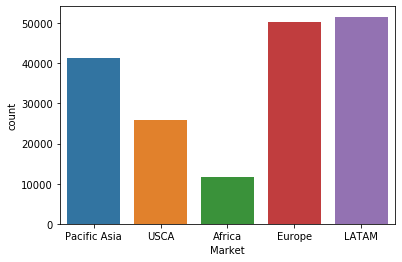

In [23]:
sns.countplot(x='Market',data=data)

In [24]:
data['Order City'].unique()

array(['Bekasi', 'Bikaner', 'Townsville', ..., 'Tongling', 'Liuyang',
       'Nashua'], dtype=object)

In [25]:
data['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [26]:
data['Order Region'].unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

In [27]:
data['Order State'].unique()

array(['Java Occidental', 'Rajastán', 'Queensland', ...,
       'Bistrita-Nasaud', 'Tottori', 'Khorezm'], dtype=object)

In [28]:
data['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [29]:
data['Product Name'].unique()

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Nike Men's Free 5.0+ Running Shoe",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Brooks Women's Ghost 6 Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera', 'Dell Laptop',
       'SOLE E25 Elliptical', 'Elevation Training Mask 2.0',
       "adidas Men's Germ

In [30]:
data['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [31]:
data.drop(['Customer Street','Product Image','Latitude','Longitude'],axis=1,inplace=True)

In [32]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks


Data scorrelation was performed for finding important parameters.

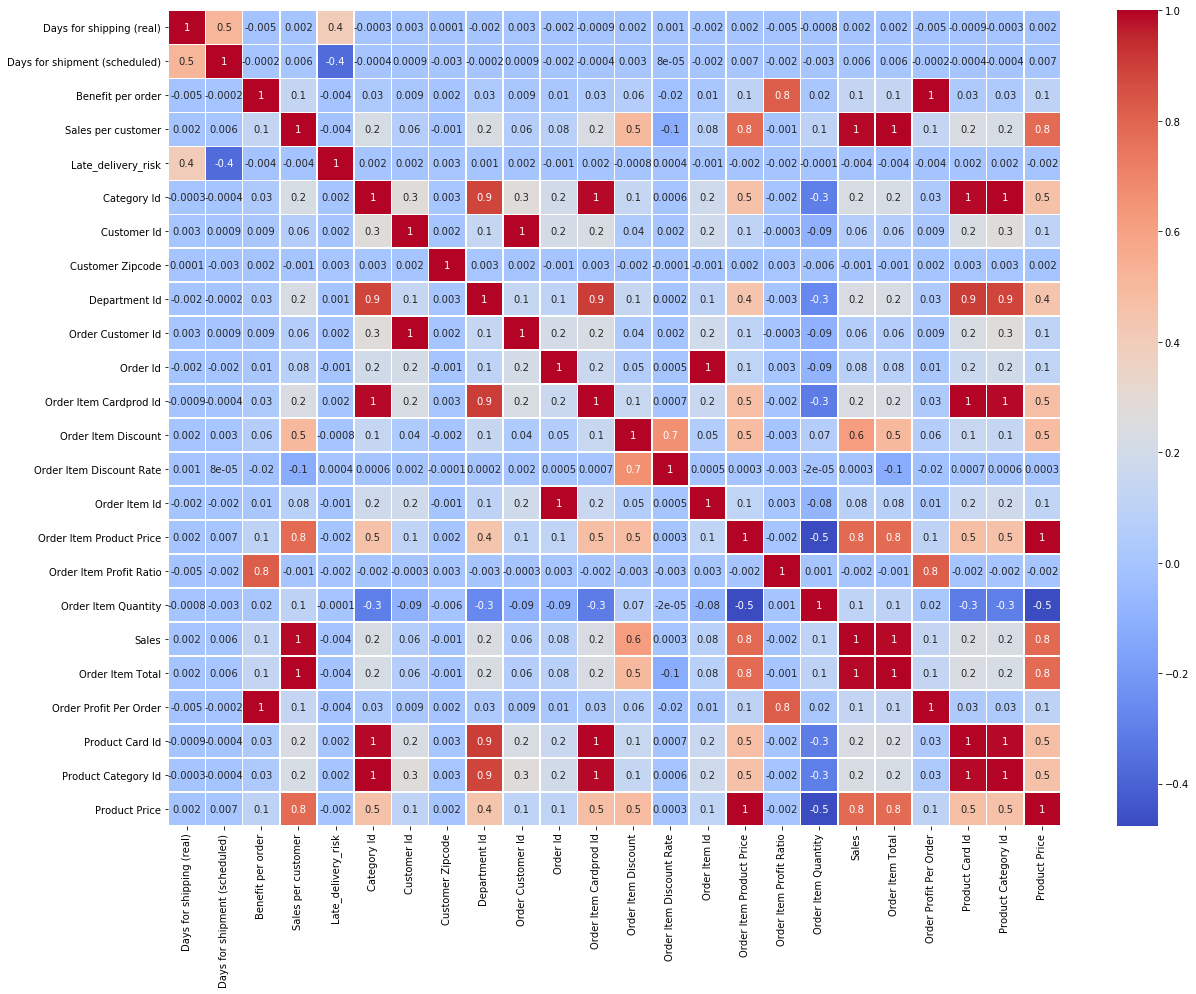

In [33]:
# Pearson Correlation
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True,linewidth=0.5,fmt='.1g',cmap='coolwarm')
plt.show()

Product price having high correlation with Sales, Order Item Total, Order Item Product Price and Sales Per Customer

Now we will look into the demographic data, to find which region has most Sales?

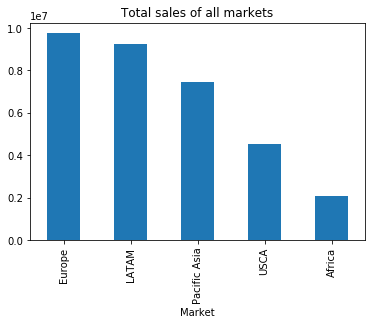

In [34]:
market=data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(title='Total sales of all markets')

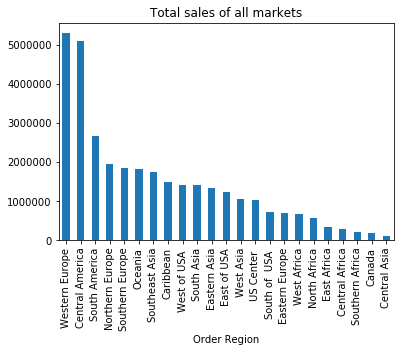

In [35]:
region=data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(title='Total sales of all markets')

From the graph, it can be seen that Europe market having most number of Sales whereas Africa having least. In these markets, Western Europe and Central America having most number of Sales whereas Central Asia having least. 

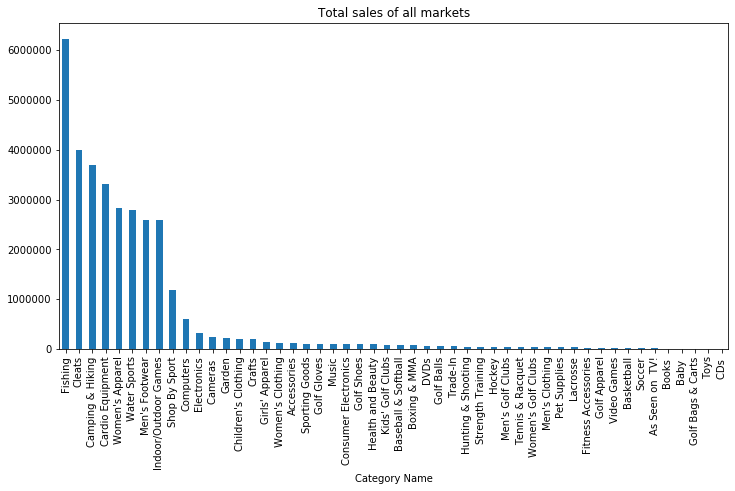

In [36]:
cat=data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Total sales of all markets')

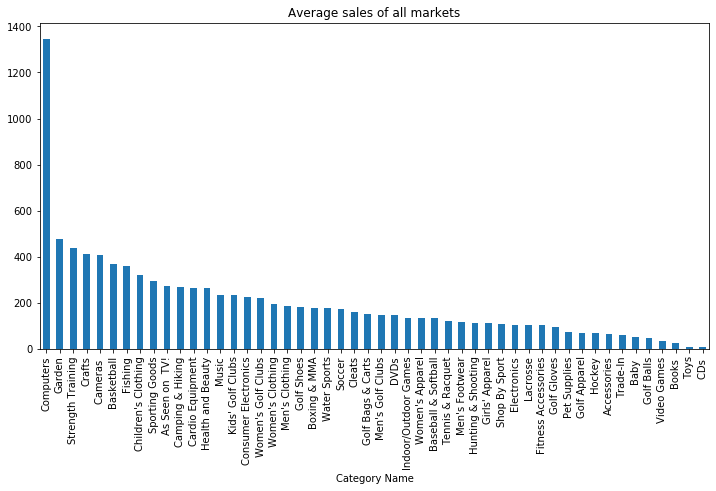

In [37]:
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Average sales of all markets')

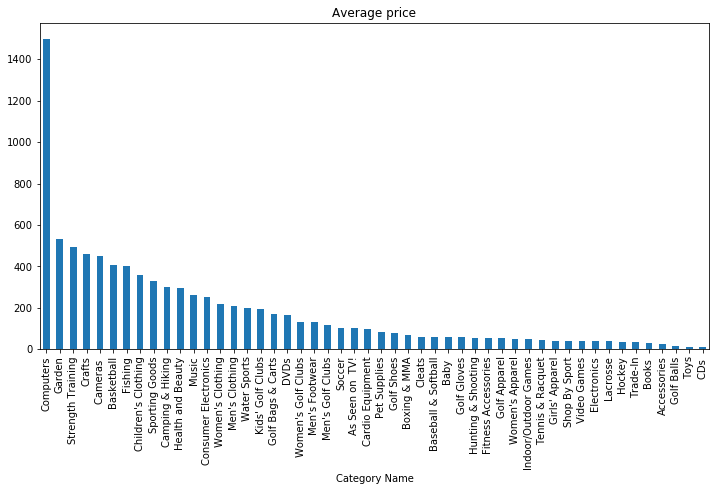

In [38]:
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Average price')

Out of all the products, Fishing category had most number of Sales followed by Cleats. It is surprising to see that top 7 products with highest price on average are the most sold products on average Computers having almost 1350 Sales despite Price beaing 1500 $.
Since correlation was high between Price & Sales, it will be interesting to see how the price is impacting the Sales for all the products.

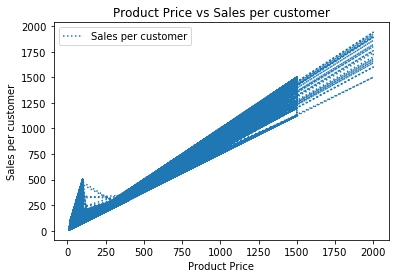

In [39]:
data.plot(x='Product Price',y='Sales per customer',linestyle='dotted')
plt.title('Product Price vs Sales per customer')
plt.ylabel('Sales per customer')
plt.show()

Price having linear relationship with the Sales. Now we will look into the sales per quarter.

In [40]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks


In [41]:
data['order date (DateOrders)']

0         1/31/2018 22:56
1         1/13/2018 12:27
2         1/13/2018 12:06
3         1/13/2018 11:45
4         1/13/2018 11:24
               ...       
180514     1/16/2016 3:40
180515     1/16/2016 1:34
180516    1/15/2016 21:00
180517    1/15/2016 20:18
180518    1/15/2016 18:54
Name: order date (DateOrders), Length: 180516, dtype: object

In [42]:
data['order_year']=pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month']=pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_month_year']=pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

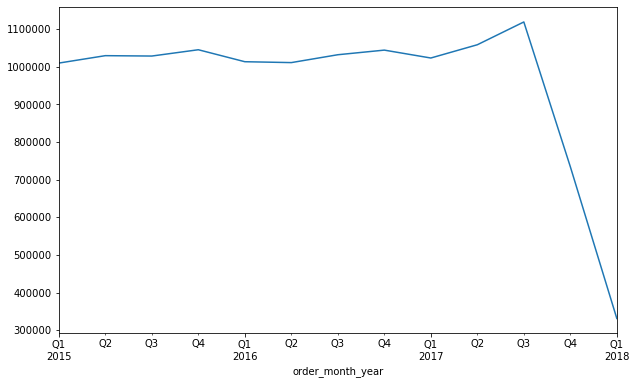

In [43]:
quarter=data.groupby('order_month_year')
quartersales=quarter['Sales'].sum().resample('Q').mean().plot(figsize=(10,6))

Sales are consistant from Q1 2015 until Q3 of 2017 and suddenly dropped by Q1 2018

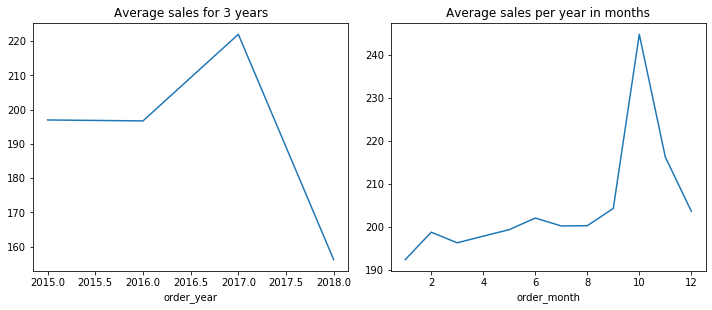

In [44]:
plt.subplot(2,2,1)
quarter=data.groupby('order_year')
quarter['Sales'].mean().plot(figsize=(10,8),title='Average sales for 3 years')
plt.subplot(2,2,2)
quarter=data.groupby('order_month')
quarter['Sales'].mean().plot(figsize=(10,8),title='Average sales per year in months')
plt.tight_layout()
plt.show()

In the year 2017, we observed highest number of Sales. The most number of orders received in the month of October. Now we will see which type of payment type was preferred by most customers.

In [45]:
transfer=data[(data['Type']=='TRANSFER')]
transfer_count=transfer['Order Region'].value_counts()
cash=data[(data['Type']=='CASH')]
cash_count=cash['Order Region'].value_counts()
payment=data[(data['Type']=='PAYMENT')]
payment_count=payment['Order Region'].value_counts()
debit=data[(data['Type']=='DEBIT')]
debit_count=debit['Order Region'].value_counts()

In [46]:
names=data['Order Region'].value_counts().keys()
names

Index(['Central America', 'Western Europe', 'South America', 'Oceania',
       'Northern Europe', 'Southeast Asia', 'Southern Europe', 'Caribbean',
       'West of USA ', 'South Asia', 'Eastern Asia', 'East of USA',
       'West Asia', 'US Center ', 'South of  USA ', 'Eastern Europe',
       'West Africa', 'North Africa', 'East Africa', 'Central Africa',
       'Southern Africa', 'Canada', 'Central Asia'],
      dtype='object')

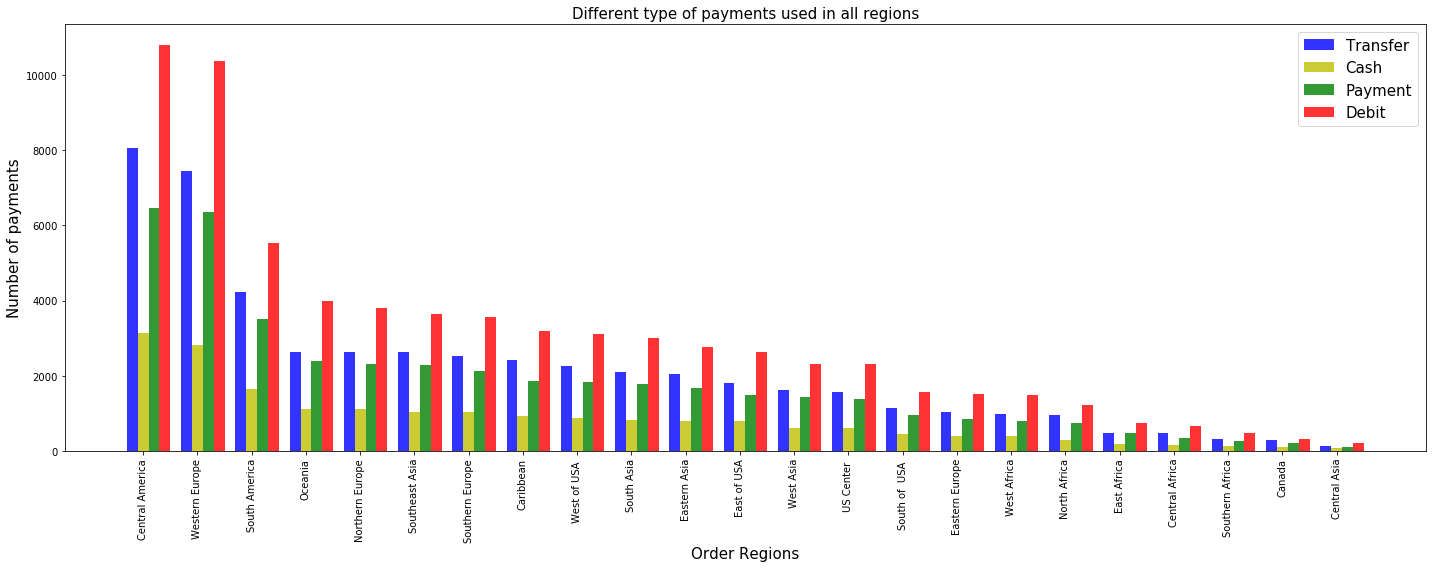

In [47]:
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
bar1=plt.bar(index,transfer_count,bar_width,alpha=opacity,color='b',label='Transfer')
bar2=plt.bar(index+bar_width,cash_count,bar_width,alpha=opacity,color='y',label='Cash')
bar3=plt.bar(index+bar_width+bar_width,payment_count,bar_width,alpha=opacity,color='g',label='Payment')
bar4=plt.bar(index+bar_width+bar_width+bar_width,debit_count,bar_width,alpha=opacity,color='r',label='Debit')
names=data['Order Region'].value_counts().keys()
plt.xlabel('Order Regions',fontsize=15)
plt.ylabel('Number of payments',fontsize=15)
plt.title('Different type of payments used in all regions',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

In all the regions, most of the people preferred Debit payment type and least preferred payment type is Cash

In [48]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway,2018,1,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna,2018,1,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado,2018,1,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate,2018,1,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks,2018,1,2018-01


Some products are having negative benifit per orders which indicates that orders are generating loss of revenue to the company. Let's see what are those products ?

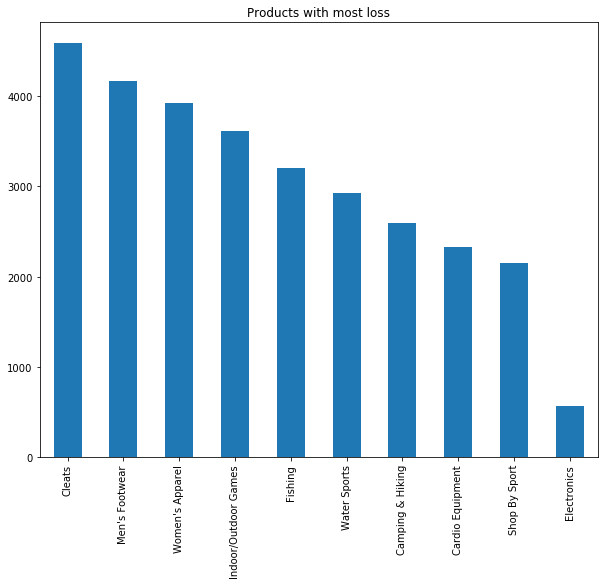

In [49]:
loss=data[(data['Benefit per order']<0)]
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(10,8),title='Products with most loss')

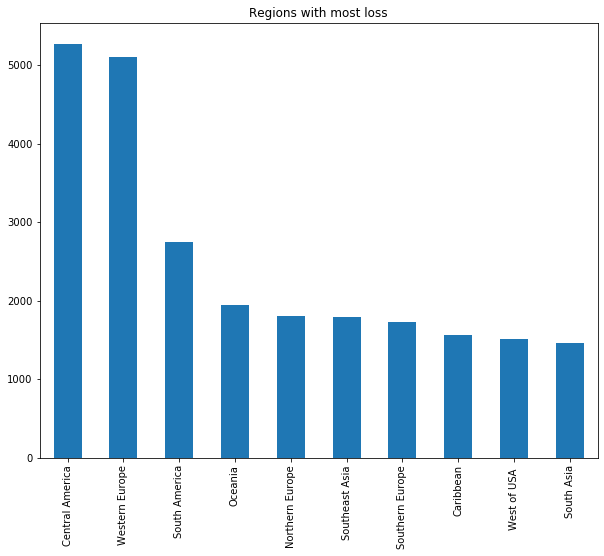

In [50]:
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(10,8),title='Regions with most loss')

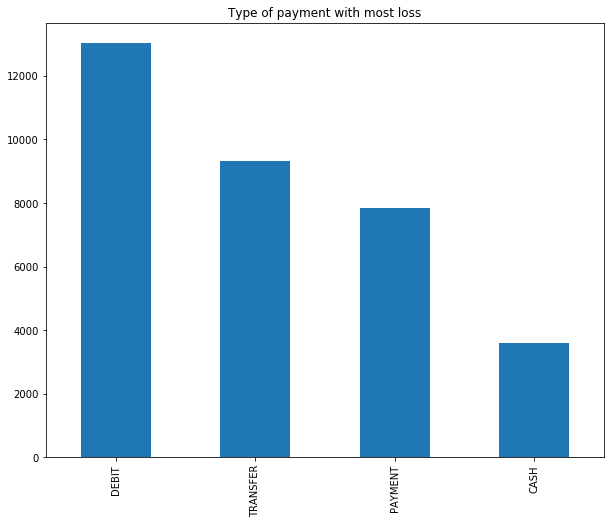

In [51]:
loss['Type'].value_counts().nlargest(10).plot.bar(figsize=(10,8),title='Type of payment with most loss')

In [52]:
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

Total revenue lost with orders -3883547.345768667


- The total revenue lost was 3.8 Million which is huge amount. It can be seen from the graph that Cleats is the category with most loss sales followed by Men's footwear.
- Central America and Western Europe was giving most lost sales and these lost sales may have happened due to fraud transactions or late deliveries.

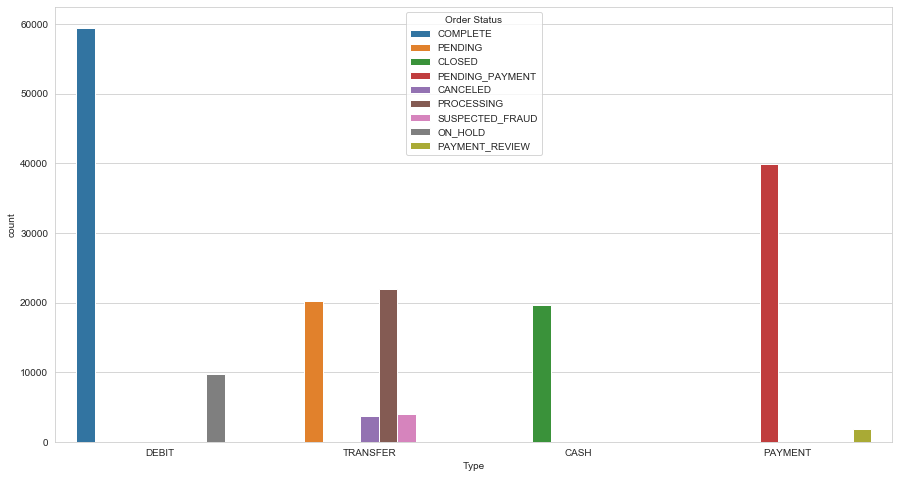

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Type',hue='Order Status',data=data)
plt.show()

It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer. Now we will see, which regions, Product category having suspected fraud?

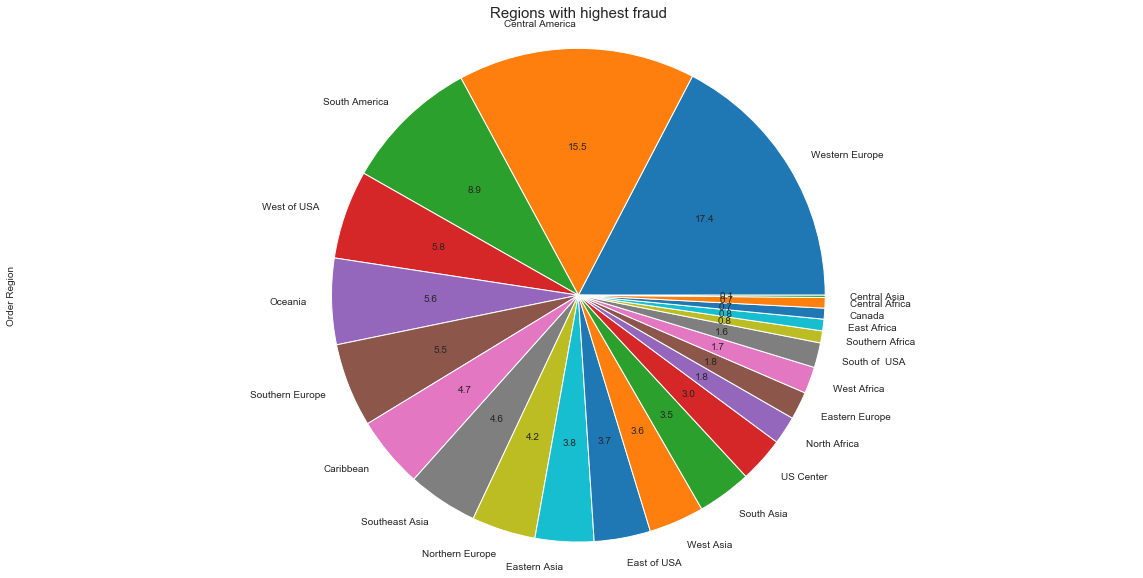

In [54]:
high_fraud=data[(data['Order Status']=='SUSPECTED_FRAUD') & (data['Type']=='TRANSFER')]
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(20,10),autopct='%.1f')
fraud.axis('equal')
plt.title('Regions with highest fraud',fontsize=15)
plt.show()

Highest number of suspected frauds are from Western Europe (i.e. 17.4%) followed by Central America (15.5%). Now we will see which product is being suspected to fraud the most?

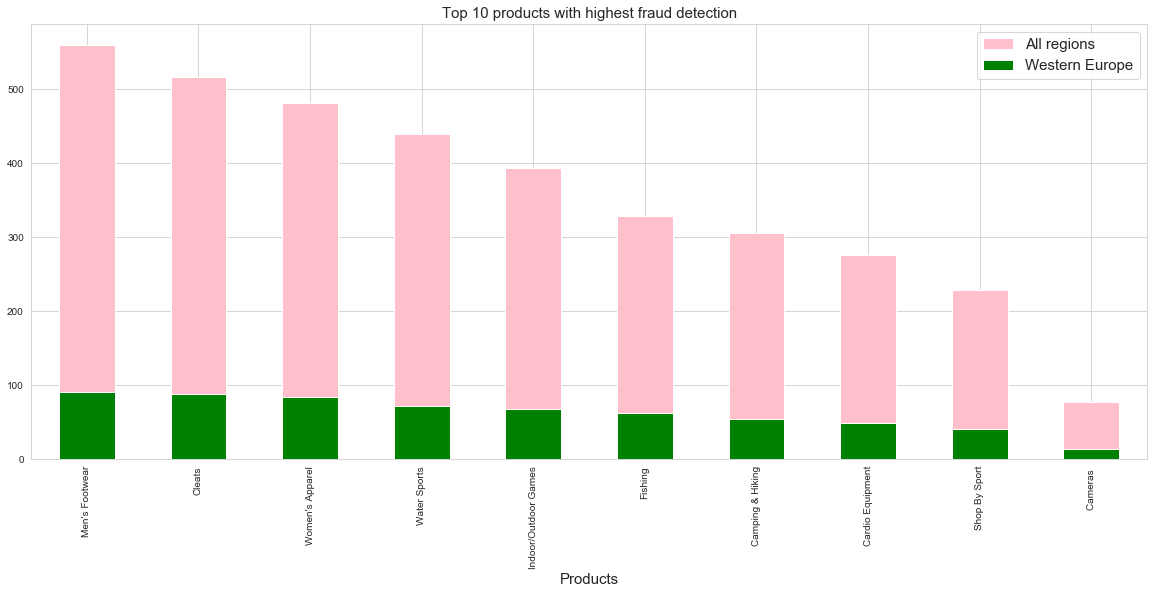

In [55]:
high_fraud1=data[(data['Order Status']=='SUSPECTED_FRAUD')]
high_fraud2=data[(data['Order Status']=='SUSPECTED_FRAUD') & (data['Order Region']=='Western Europe')]
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category',color='pink')
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud product Category in Western Europe',color='green')
plt.legend(['All regions','Western Europe'],fontsize=15)
plt.title('Top 10 products with highest fraud detection',size=15)
plt.xlabel('Products',size=15)
plt.show()

Highest number of Frauds were detected in Men's Footwear then Cleats and Women's Apparel in all the regions. Out of all the regions, 1/6th of the frauds were happening in Western Europe. Which customers are conducting all these frauds?

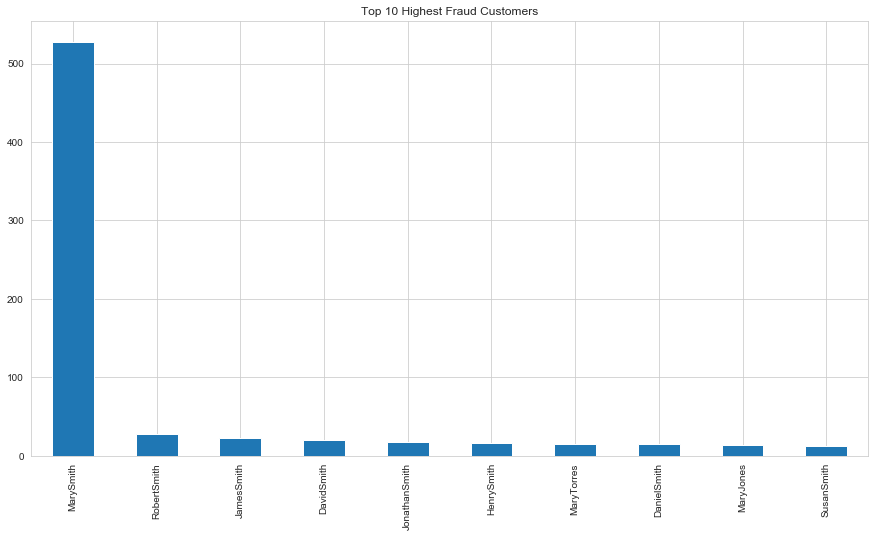

In [56]:
customer=data[(data['Order Status']=='SUSPECTED_FRAUD')]
customer['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(15,8),title='Top 10 Highest Fraud Customers')

The customer named Mary Smith was responsible for doing highest number of frauds. How much amount did she conduct fraud orders?

In [57]:
amount=data[(data['Customer Full Name']=='MarySmith') & (data['Order Status']=='SUSPECTED_FRAUD')]
amount['Sales'].sum()                                

102491.66191043999

The total amount was around 102k which is very huge amount to the company.

The important aspect for a supply chain company was delivering the product to the customer on time without late delivery. If the product is being delivered late, then the customer will not be satisfied and the company may loose this customer for future orders. Which category of products are being delivered late the most?

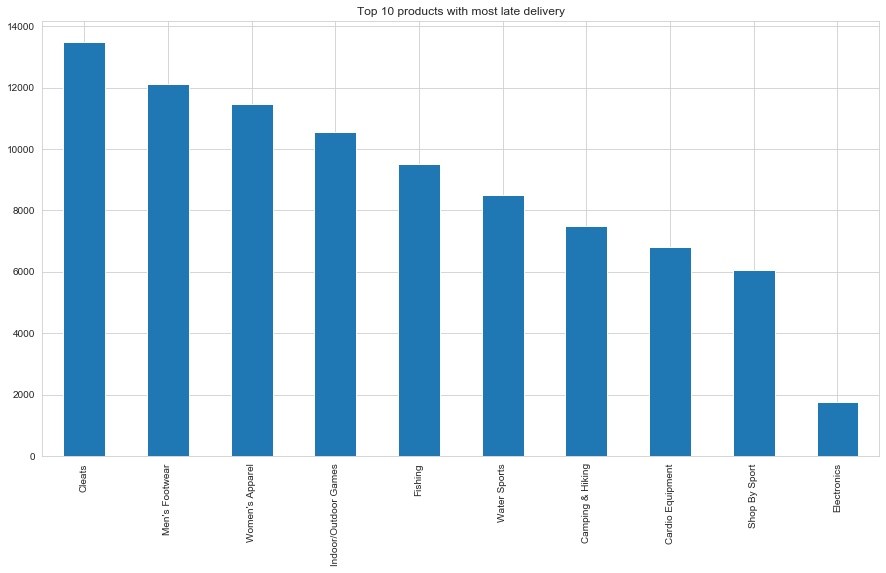

In [58]:
late_delivery=data[(data['Delivery Status']=='Late delivery')]
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,8),title='Top 10 products with most late delivery')

It can be seen that Cleats category orders delayed the most followed by men's footwear.

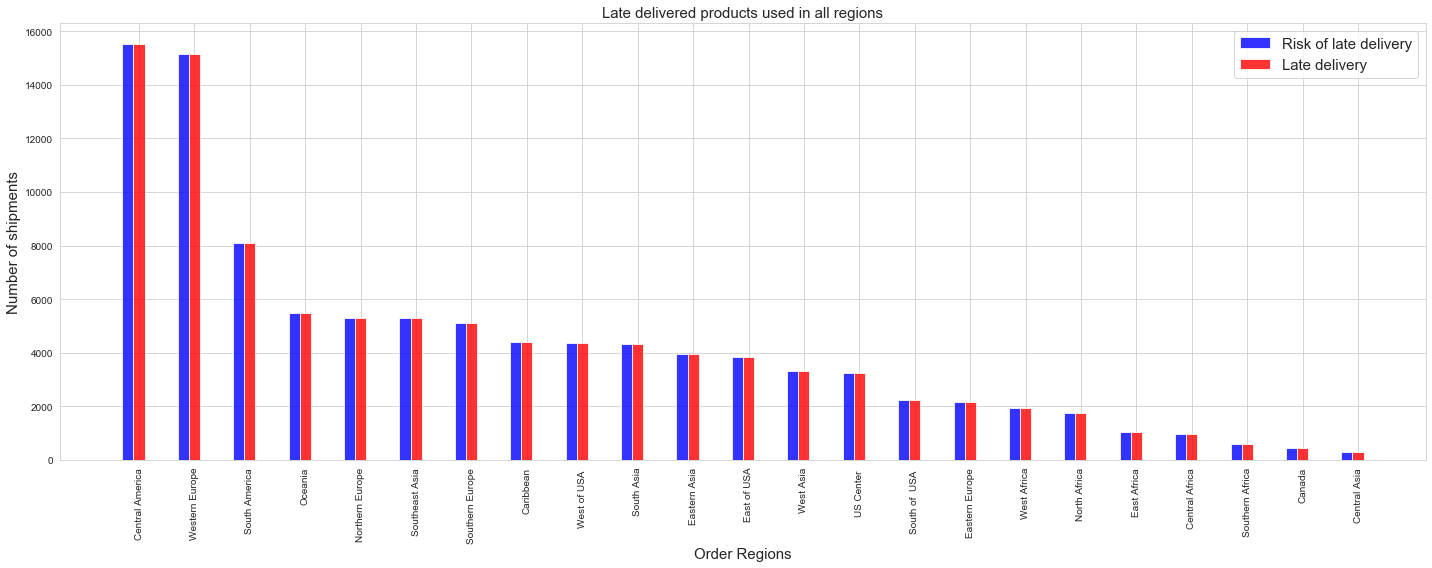

In [59]:
temp1=data[(data['Late_delivery_risk']==1)]
count1=temp1['Order Region'].value_counts()
temp2=data[(data['Delivery Status']=='Late delivery')]
count2=temp2['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
bar1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Risk of late delivery')
bar2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Late delivery')
plt.xlabel('Order Regions',fontsize=15)
plt.ylabel('Number of shipments',fontsize=15)
plt.title('Late delivered products used in all regions',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

For all the products with late delivery risk irrespective of region the product is actually delivered late. To avoid the late delivery, the company has to improve their shipping method or they have to promise more number of delivery estimation to the customer. We will see which type of shipping method is having most number of late deliveries ?

In [60]:
temp1=data[(data['Delivery Status']=='Late delivery') & (data['Shipping Mode'] == 'Standard Class') ]
std_count=temp1['Order Region'].value_counts()
temp2=data[(data['Delivery Status']=='Late delivery') & (data['Shipping Mode'] == 'First Class') ]
first_count=temp2['Order Region'].value_counts()
temp3=data[(data['Delivery Status']=='Late delivery') & (data['Shipping Mode'] == 'Second Class') ]
second_count=temp3['Order Region'].value_counts()
temp4=data[(data['Delivery Status']=='Late delivery') & (data['Shipping Mode'] == 'Same Day') ]
same_count=temp4['Order Region'].value_counts()

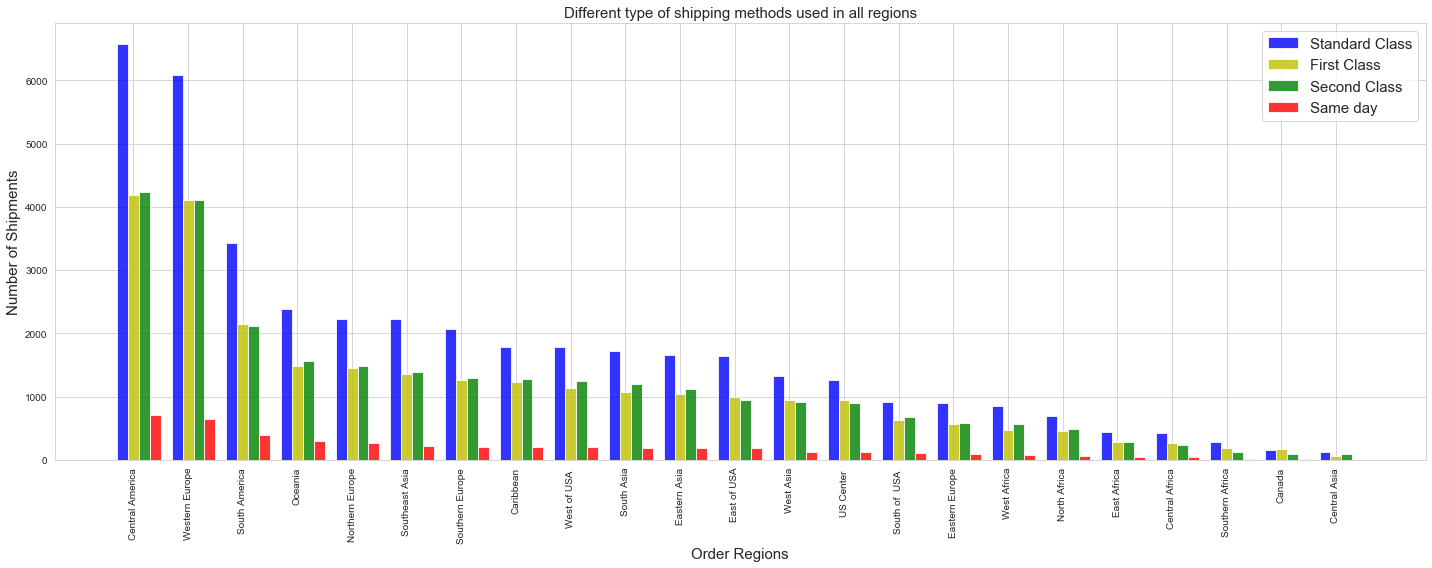

In [61]:
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
bar1=plt.bar(index,std_count,bar_width,alpha=opacity,color='b',label='Standard Class')
bar2=plt.bar(index+bar_width,first_count,bar_width,alpha=opacity,color='y',label='First Class')
bar3=plt.bar(index+bar_width+bar_width,second_count,bar_width,alpha=opacity,color='g',label='Second Class')
bar4=plt.bar(index+bar_width+bar_width+bar_width,same_count,bar_width,alpha=opacity,color='r',label='Same day')
plt.xlabel('Order Regions',fontsize=15)
plt.ylabel('Number of Shipments',fontsize=15)
plt.title('Different type of shipping methods used in all regions',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

The most number of late deliveries happened due to Standard Class shipping and the Same day shipping method having least number of late deliveries.

### Customer Segmentation

By performing customer segmentation, we can find similar characteristics in each customer’s behaviour and needs. Then, those are generalized into groups to satisfy demands with various strategies. Moreover, those strategies can be an input of the
- Targeted marketing activities to specific groups
- Launch of features aligning with the customer demand
- Development of the product roadmap

There are many ways to perform this segmentation. The one we are going to use is called RFM.
RFM is one of the most widely used techniques for selecting significant customers. It is a very popular customer segmentation technique that uses the customers’ past purchase behavior to divide them into different groups based on similarities.

In [62]:
data['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

The last order in the dataset was made on 2018-01-31. So the present time is set slightly above than the last order time for more accuracy of recency value. 

- Recency (R) represents the number of days since the customer's last purchase; 
- Frequency (F) represents the number of times the customer has purchased in the timeframe being analyzed; 
- Monetary (M) represents the total amount spent by the customer in the same period.

In [63]:
# Calcuation Monetary
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']
# Calculation Recency 
data['order date (DateOrders)'].max()
#Present date was set to next day of the last order. i.e,2018-02-01
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
# Grouping by CustomerID and Calculation frequency
rfm = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
rfm['order date (DateOrders)'] = rfm['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
rfm.rename(columns={'order date (DateOrders)': 'Recency', 
                         'Order Id': 'Frequency', 
                         'TotalPrice': 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


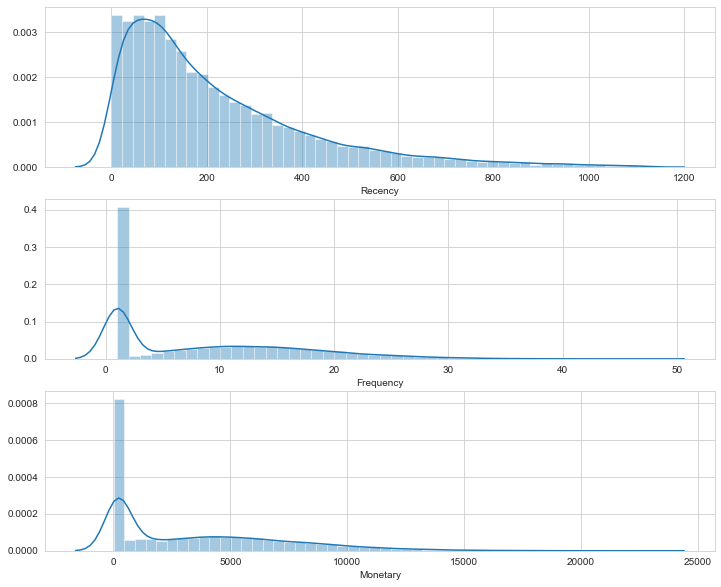

In [64]:
plt.figure(figsize=(12,10)) # Figure size
plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency'])# Plot distribution of Recency
plt.subplot(3, 1, 2) 
sns.distplot(rfm['Frequency'])# Plot distribution of Frequency
plt.subplot(3, 1, 3)
sns.distplot(rfm['Monetary'])# Plot distribution of Monetary
plt.show()

After calculating the Recency, Frequency, and Monetary values for each customer, we need to bin them into 4 distinct categories. With this, we can rank the different types of customers based on these categories.

In [65]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'Frequency': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'Monetary': {0.25: 258.0400085, 0.5: 2575.80001078, 0.75: 6003.24008751}}

In [66]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [67]:
# New column for R_Score to indicate numerical score between 1 to 4.
rfm['R_Score'] = rfm['Recency'].apply(R_Score, args=('Recency',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
rfm['F_Score'] = rfm['Frequency'].apply(FM_Score, args=('Frequency',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
rfm['M_Score'] = rfm['Monetary'].apply(FM_Score, args=('Monetary',quantiles))
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,4,4,3
2,136,10,2842.700073,2,2,2
3,229,18,6143.760057,3,1,1
4,380,14,4370.629991,4,2,2
5,457,7,2993.790032,4,3,2


In [68]:
# Create new column by combining R,F,M Scores
rfm['RFM_Score']=rfm.R_Score.astype(str)+rfm.F_Score.astype(str)+rfm.M_Score.astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,2362.250061,4,4,3,443
2,136,10,2842.700073,2,2,2,222
3,229,18,6143.760057,3,1,1,311
4,380,14,4370.629991,4,2,2,422
5,457,7,2993.790032,4,3,2,432


In [69]:
count=rfm['RFM_Score'].unique()
print(count)
len(count)

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '412' '433' '321' '423' '333' '312' '221' '223' '332' '233' '232' '323'
 '444' '431' '343' '243' '344' '334' '244' '143' '144']


33

It can be seen that there are 33 different customer segments. To make it easier for segmentation individual R,F,M scores are added together

In [70]:
# Calculate RFM_Score
rfm['RFM_Total_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12], dtype=int64)

There are 9 values in total for customer segmentation. Appropriate names were assigned for each value seperately.

In [71]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
rfm['Customer_Segmentation'] =rfm.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,792,1,2362.250061,4,4,3,443,11,Champions
2,136,10,2842.700073,2,2,2,222,6,Cant lose them
3,229,18,6143.760057,3,1,1,311,5,At Risk
4,380,14,4370.629991,4,2,2,422,8,Promising
5,457,7,2993.790032,4,3,2,432,9,Recent Customers


Howmany Customers are present in each segment?

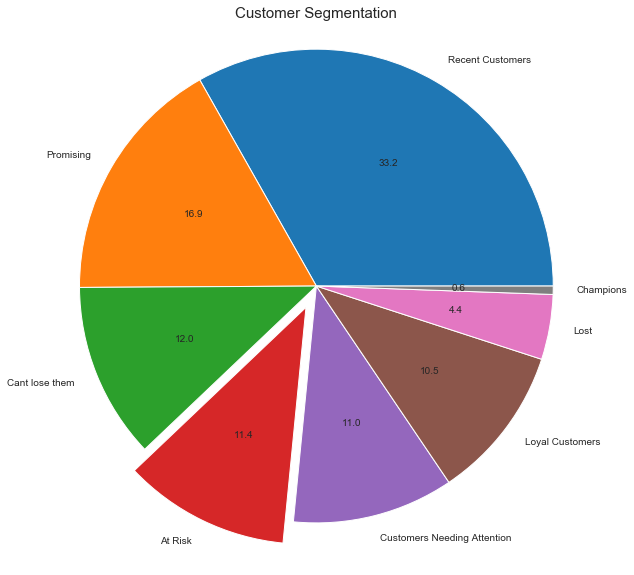

In [72]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f')
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal')
plt.show()

It can be seen that 11.4% of customers are at risk and 11% of customers needs attention else they will be lost. Nearly 4.4% customers are already lost.

Top 10 Churned best customers who has not purchased anything in a while

In [73]:
rfm[(rfm['Customer_Segmentation']=='Cant lose them')].sort_values('Monetary',ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
11065,309,41,18641.300091,4,1,1,411,6,Cant lose them
6285,332,37,18287.010097,4,1,1,411,6,Cant lose them
7892,392,29,17620.470196,4,1,1,411,6,Cant lose them
2893,312,24,17536.609842,4,1,1,411,6,Cant lose them
4181,425,29,17333.960094,4,1,1,411,6,Cant lose them
4781,502,31,17048.380088,4,1,1,411,6,Cant lose them
9271,344,35,17044.910217,4,1,1,411,6,Cant lose them
4659,417,27,16973.060024,4,1,1,411,6,Cant lose them
1695,326,33,16916.020176,4,1,1,411,6,Cant lose them


These customers used to place huge amount of orders very frequently but now they are not placing any orders which means these customers are purchasing orders from other companies. These group of customers need to be targetted with offers to gain them back.

Top 10 new best customers who place costly orders often

In [74]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
rfm[(rfm['RFM_Score']=='144')|(rfm['RFM_Score']=='143')].sort_values('Monetary',ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
18101,38,1,1500.0,1,4,3,143,8,Promising
18083,39,1,1500.0,1,4,3,143,8,Promising
18047,39,1,1500.0,1,4,3,143,8,Promising
18065,39,1,1500.0,1,4,3,143,8,Promising
18119,38,1,1500.0,1,4,3,143,8,Promising
18046,39,1,1485.0,1,4,3,143,8,Promising
18100,38,1,1485.0,1,4,3,143,8,Promising
18118,38,1,1485.0,1,4,3,143,8,Promising
18064,39,1,1485.0,1,4,3,143,8,Promising


The above customers are placing frequent order with high amount. These are having potential to become best customers & this people should be targetted to convert them into loyal customers. All these different segment of customers should be targetted with different advertisements and rewards for increased profits.

### Data Modeliing

In [75]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_month_year,TotalPrice
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.75,Standard Class,CallyHolloway,2018,1,2018-01,314.640015
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.75,Standard Class,IreneLuna,2018,1,2018-01,311.359985
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado,2018,1,2018-01,309.720001
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,Smart watch,327.75,Standard Class,TanaTate,2018,1,2018-01,304.809998
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,Smart watch,327.75,Standard Class,OrliHendricks,2018,1,2018-01,298.250000


In [76]:
# A new dataset is created with the copy of original data for training the data and validation.
new_data=data.copy()

In [77]:
new_data['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [78]:
new_data['Order Status'].value_counts()

COMPLETE           59489
PENDING_PAYMENT    39831
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better.

In [79]:
new_data['fraud'] = np.where(new_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [80]:
new_data['fraud'].value_counts()

0    176454
1      4062
Name: fraud, dtype: int64

In [81]:
new_data['late_delivery'] = np.where(new_data['Delivery Status'] == 'Late delivery', 1, 0)

In [82]:
new_data['late_delivery'].value_counts()

1    98976
0    81540
Name: late_delivery, dtype: int64

For measuring machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [83]:
#Dropping columns with repeated values
new_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [84]:
new_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library. We are not using One Hot encoder because some features having large number of variables in single column which will generate more number of columns.

In [85]:
label_en=preprocessing.LabelEncoder()
new_data['Customer Country']  = label_en.fit_transform(new_data['Customer Country'])
new_data['Market']            = label_en.fit_transform(new_data['Market'])
new_data['Type']              = label_en.fit_transform(new_data['Type'])
new_data['Product Name']      = label_en.fit_transform(new_data['Product Name'])
new_data['Customer Segment']  = label_en.fit_transform(new_data['Customer Segment'])
new_data['Customer State']    = label_en.fit_transform(new_data['Customer State'])
new_data['Order Region']      = label_en.fit_transform(new_data['Order Region'])
new_data['Order City']        = label_en.fit_transform(new_data['Order City'])
new_data['Category Name']     = label_en.fit_transform(new_data['Category Name'])
new_data['Customer City']     = label_en.fit_transform(new_data['Customer City'])
new_data['Department Name']   = label_en.fit_transform(new_data['Department Name'])
new_data['Order State']       = label_en.fit_transform(new_data['Order State'])
new_data['Shipping Mode']     = label_en.fit_transform(new_data['Shipping Mode'])
new_data['Order Country']     = label_en.fit_transform(new_data['Order Country'])
new_data['Customer Full Name']= label_en.fit_transform(new_data['Customer Full Name'])

#display the initial records
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,65,1,20755,...,73,78,327.75,3,1876,2018,1,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,65,1,19492,...,73,78,327.75,3,5377,2018,1,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,451,0,19491,...,73,78,327.75,3,4428,2018,1,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,284,0,19490,...,73,78,327.75,3,12927,2018,1,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,65,1,19489,...,73,78,327.75,3,10637,2018,1,298.250000,0,0


In [86]:
new_data.dtypes

Type                               int32
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                      int32
Customer City                      int32
Customer Country                   int32
Customer Id                        int64
Customer Segment                   int32
Customer State                     int32
Customer Zipcode                 float64
Department Id                      int64
Department Name                    int32
Market                             int32
Order City                         int32
Order Country                      int32
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

Now all the data is transformed into int type. The dataset is split into train data and test data so model can be trained with train data and the performance of model can be evaluated using test data.

### Comparision of Classification Models

In [87]:
Xf=new_data.drop('fraud',axis=1)
yf=new_data['fraud']
Xf_train,Xf_test,yf_train,yf_test=train_test_split(Xf,yf,test_size=0.20,random_state=42)

In [88]:
Xl=new_data.drop('late_delivery',axis=1)
yl=new_data['late_delivery']
Xl_train,Xl_test,yl_train,yl_test=train_test_split(Xl,yl,test_size=0.20,random_state=42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [89]:
std_scl=StandardScaler()
Xf_train=std_scl.fit_transform(Xf_train)
Xf_test=std_scl.fit_transform(Xf_test)
Xl_train=std_scl.fit_transform(Xl_train)
Xl_test=std_scl.fit_transform(Xl_test)

The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics.

To measure the performance of different models F1 score is used as the main metric because it is the harmonic mean of precison score and recall score. And all the scores are multiplied with 100 for better understanding

In [90]:
def classifier_model(model_f,model_l,Xf_train,Xf_test,yf_train,yf_test,Xl_train,Xl_test,yl_train,yl_test):
    model_f=model_f.fit(Xf_train,yf_train)
    model_l=model_l.fit(Xl_train,yl_train)
    yf_pred=model_f.predict(Xf_test)
    yl_pred=model_l.predict(Xl_test)
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

#### Logistic Regression 

In [91]:
model_f = LogisticRegression(random_state=0) #the classification model
model_l = LogisticRegression(random_state=0) #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

C:\Users\santh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model paramters used are : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of fraud status is        : 97.79248836693995 %
Recall score of fraud status is        : 56.52173913043478 %
Conf Matrix of fraud status is        :
 [[35138   130]
 [  667   169]]
F1 score of fraud status is        : 29.779735682819386 %
Accuracy of late delivery status is: 98.89762907157102 %
Recall score of late delivery status is: 98.02970297029702 %
Conf Matrix of late delivery status is: 
 [[15904   398]
 [    0 19802]]
F1 score of late delivery status is: 99.00504974751261 %


C:\Users\santh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Gaussian Navie Bias

In [92]:
model_f = GaussianNB() #the classification model
model_l = GaussianNB() #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

Model paramters used are : GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy of fraud status is        : 97.68446709505872 %
Recall score of fraud status is        : 0.0 %
Conf Matrix of fraud status is        :
 [[35268     0]
 [  836     0]]
F1 score of fraud status is        : 0.0 %
Accuracy of late delivery status is: 45.15289164635497 %
Recall score of late delivery status is: 0.0 %
Conf Matrix of late delivery status is: 
 [[16302     0]
 [19802     0]]
F1 score of late delivery status is: 0.0 %


C:\Users\santh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Machine

In [93]:
model_f = svm.LinearSVC() #the classification model
model_l = svm.LinearSVC() #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

C:\Users\santh\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model paramters used are : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy of fraud status is        : 97.75925105251495 %
Recall score of fraud status is        : 55.0561797752809 %
Conf Matrix of fraud status is        :
 [[35148   120]
 [  689   147]]
F1 score of fraud status is        : 26.654578422484132 %
Accuracy of late delivery status is: 98.89762907157102 %
Recall score of late delivery status is: 98.02970297029702 %
Conf Matrix of late delivery status is: 
 [[15904   398]
 [    0 19802]]
F1 score of late delivery status is: 99.00504974751261 %


C:\Users\santh\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### K Nearest Neighbor

In [94]:
model_f = KNeighborsClassifier(n_neighbors=1) #the classification model
model_l = KNeighborsClassifier(n_neighbors=1) #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

Model paramters used are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Accuracy of fraud status is        : 97.3160868601817 %
Recall score of fraud status is        : 38.97180762852405 %
Conf Matrix of fraud status is        :
 [[34900   368]
 [  601   235]]
F1 score of fraud status is        : 32.661570535093816 %
Accuracy of late delivery status is: 80.52016397075117 %
Recall score of late delivery status is: 82.73598933497411 %
Conf Matrix of late delivery status is: 
 [[12935  3367]
 [ 3666 16136]]
F1 score of late delivery status is: 82.10660221345884 %


#### Random Forest

In [95]:
model_f = RandomForestClassifier() #the classification model
model_l = RandomForestClassifier() #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

Model paramters used are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy of fraud status is        : 98.56248615111899 %
Recall score of fraud status is        : 95.67723342939482 %
Conf Matrix of fraud status is        :
 [[35253    15]
 [  504   332]]
F1 score of fraud status is        : 56.128486897717664 %
Accuracy of late delivery status is: 99.00842011965433 %
Recall score of late delivery status is: 98.22420634920634 %
Conf Matrix of late delivery status is: 
 [[15944   358]
 [ 

#### XG Boost

In [96]:
model_f = xgb.XGBClassifier() #the classification model
model_l = xgb.XGBClassifier() #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

C:\Users\santh\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model paramters used are : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()'

#### Decision Tree

In [97]:
model_f = tree.DecisionTreeClassifier() #the classification model
model_l = tree.DecisionTreeClassifier() #the classification model
#Giving inputs to the defined function
classifier_model(model_f,model_l,Xf_train, Xf_test,yf_train,yf_test,Xl_train, Xl_test,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy of fraud status is        : 98.73144249944605 %
Recall score of fraud status is        : 72.44655581947742 %
Conf Matrix of fraud status is        :
 [[35036   232]
 [  226   610]]
F1 score of fraud status is        : 72.70560190703219 %
Accuracy of late delivery status is: 99.02226900066474 %
Recall score of late delivery status is: 99.18070095584889 %
Conf Matrix of late delivery status is: 
 [[16140   162]
 [  191 19611]]
F1 score of late delivery status is: 99.10802274162981 %


In [98]:
#Giving column Values
classification_data = {'Classification Model':  ['Logistic','Gausian Naive bayes','Support Vector Machines','K nearest Neighbour',
                                'Random Forest','eExtreme gradient boosting','Decision tree'],
        'Accuracy Score for Fraud Detection':     [97.81,97.73,97.77,97.24,98.50,98.77,98.4],
        'Recall Score for Fraud Detection':       [55.1,0,52.65,36.32,97.06,87.94,63],
        'F1 Score for Fraud Detection':           [29.29,0,27.45,32.29,51.46,66.02,66.51],
        'Accuracy Score for Late Delivery':       [98.83,45.21,98.8,79.95,98.93,98.99,98.65],
        'Recall Score for Late Delivery':         [97.91,0,97.91,82.31,98.08,98.23,99.2],
        'F1 Score for Late Delivery':             [98.94,0,98.94,81.53,99.03,99.09,98.76]}
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection','Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])

In [99]:
classification_comparision

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.81,55.10,29.29,98.83,97.91,98.94
1,Gausian Naive bayes,97.73,0.00,0.00,45.21,0.00,0.00
2,Support Vector Machines,97.77,52.65,27.45,98.80,97.91,98.94
3,K nearest Neighbour,97.24,36.32,32.29,79.95,82.31,81.53
4,Random Forest,98.50,97.06,51.46,98.93,98.08,99.03
5,eExtreme gradient boosting,98.77,87.94,66.02,98.99,98.23,99.09
6,Decision tree,98.40,63.00,66.51,98.65,99.20,98.76


- Considering F1 score it is clear that Decision tree classifier is performing better for classification type with F1 score of almost 66.5 % for fraud detection. 
- For late delivery eExtreme gradient boosting classifier is performing better for classification type with F1 score of almost 99.09 %. 
- Just to make sure that model is predicting correctly the model is cross validated and the results are compared with accuracy of the model. 

In [100]:
#Defining cross validation model
def cross_validation_model(model_f,model_l,Xf,yf,Xl,yl):
    model_f= model_f.fit(Xf,yf)
    model_l = model_l.fit(Xl,yl)
    scores_f = cross_val_score(model_f, Xf, yf, cv=10)
    scores_l = cross_val_score(model_l, Xl, yl, cv=10)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [101]:
cross_validation_model(model_f,model_l,Xf,yf,Xl,yl)

Model used is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Cross validation accuracy of fraud: 0.98 (+/- 0.03)
Cross validation accuracy of late : 0.98 (+/- 0.05)


The difference between accuracy score and cross validation score is less than 1% which means the model is neither overfitted or underfitted. Now by using feature importance method we will find the important variables.

### Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

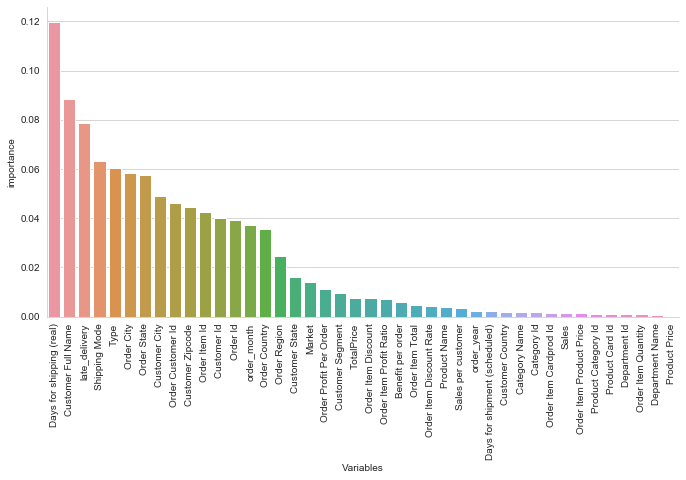

In [102]:
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':Xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

Even though fraud detection is not related to Days for shipping(real), still our model is giving importance of 0.12. Other parameters like Customer Full Name, late_delivery, Shipping Mode, Payment Type are given importance of 0.07 which helps the company to detect fraud acuurately when same customer is conducting fraud.

Which variables were given importance for prediction of late delivery ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

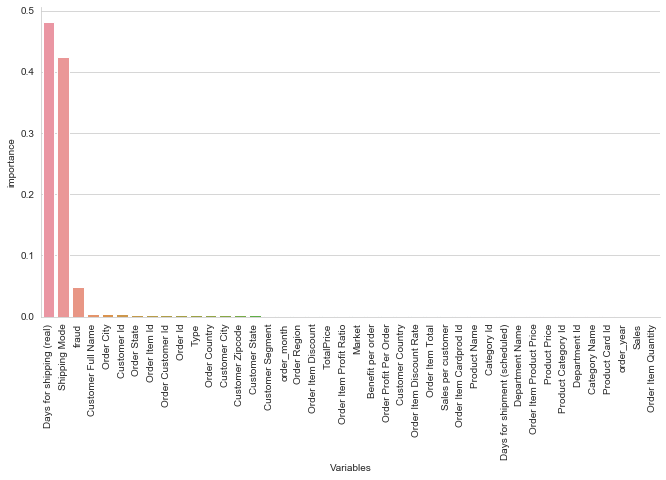

In [103]:
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':Xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

Days for shipping(real) and Shipping mode is given importance of 0.9 by our model. So, for avoiding late delivery we need to focus on these two features.

### Comparison of Regression Models

Regression models are going to use for predicting Sales & Order quantity 

In [104]:
# Xs=new_data.drop('Sales',axis=1)
Xs=new_data.loc[:, new_data.columns != 'Sales']
ys=new_data['Sales']
Xs_train,Xs_test,ys_train,ys_test=train_test_split(Xs,ys,test_size=0.20,random_state=42)
Xq=new_data.drop('Order Item Quantity',axis=1)
yq=new_data['Order Item Quantity']
Xq_train,Xq_test,yq_train,yq_test=train_test_split(Xq,yq,test_size=0.20,random_state=42)

In [105]:
Xs

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,65,1,20755,...,73,78,327.750000,3,1876,2018,1,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,65,1,19492,...,73,78,327.750000,3,5377,2018,1,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,451,0,19491,...,73,78,327.750000,3,4428,2018,1,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,284,0,19490,...,73,78,327.750000,3,12927,2018,1,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,65,1,19489,...,73,78,327.750000,3,10637,2018,1,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,...,45,24,399.980011,3,8425,2016,1,399.980011,0,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,...,45,24,399.980011,2,11678,2016,1,395.980011,0,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,...,45,24,399.980011,3,6299,2016,1,391.980011,0,1
180517,2,3,4,186.229996,387.980011,45,18,65,1,2813,...,45,24,399.980011,3,9383,2016,1,387.980011,0,0


In [106]:
MM_scl=MinMaxScaler()
Xs_train=MM_scl.fit_transform(Xs_train)
Xs_test=MM_scl.fit_transform(Xs_test)
Xq_train=MM_scl.fit_transform(Xq_train)
Xq_test=MM_scl.fit_transform(Xq_test)

In [107]:
def regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test):
    model_s=model_s.fit(Xs_train,ys_train)#Fitting train data for sales
    model_q=model_q.fit(Xq_train,yq_train)#Fitting train data for order quantity
    ys_pred=model_s.predict(Xs_test)#predicting sales with test data
    yq_pred=model_q.predict(Xq_test)#predicting order quantity with test data
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used
    #Printing mean absolute error for predicting sales
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    #Printing Root mean squared error for predicting sales
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    #Printing mean absolute error for predicting order quantity
    print("MAE of order quantity   :", metrics.mean_absolute_error(yq_test,yq_pred))
    #Printing Root mean squared error for predicting order quantity
    print("RMSE of order quantity  :",np.sqrt(metrics.mean_squared_error(yq_test,yq_pred)))

#### Lasso Regression

In [108]:
model_s = linear_model.Lasso(alpha=0.1)
model_q = linear_model.Lasso(alpha=0.1)
regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test)

Model parameter used are: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE of sales is         : 15.329271162990588
RMSE of sales is        : 18.48609919897899
MAE of order quantity   : 0.9033215868558657
RMSE of order quantity  : 1.0304917753217733


#### Ridge Regression

In [109]:
model_s = Ridge(alpha=1.0)
model_q = Ridge(alpha=1.0)
regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test)

Model parameter used are: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE of sales is         : 15.013801864550834
RMSE of sales is        : 18.79917620434063
MAE of order quantity   : 0.35136194841106744
RMSE of order quantity  : 0.5318192481455857


#### Random Forest Regression

In [110]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_q = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test)

Model parameter used are: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)
MAE of sales is         : 22.29740521651311
RMSE of sales is        : 46.10711738425903
MAE of order quantity   : 0.002426059758543118
RMSE of order quantity  : 0.028504023314400502


#### eXtreme Gradient Boosting Regression

In [111]:
model_s = xgb.XGBRegressor()
model_q = xgb.XGBRegressor()
regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test)

Model parameter used are: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
MAE of sales is         : 19.65159190456905
RMSE of sales is        : 38.11331098699569
MAE of order quantity   : 0.01757181458275888
RMSE of order quantity  : 0.06149263776296715


#### Decision Tree Regression

In [112]:
model_s = tree.DecisionTreeRegressor()
model_q = tree.DecisionTreeRegressor()
regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test)

Model parameter used are: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAE of sales is         : 22.18520732063844
RMSE of sales is        : 43.84130666013458
MAE of order quantity   : 0.0022989142477287837
RMSE of order quantity  : 0.04794699414696174


#### Linear Regression

In [113]:
model_s=LinearRegression()
model_q=LinearRegression()
regressionmodel(model_s,model_q,Xs_train, Xs_test,ys_train,ys_test,Xq_train, Xq_test,yq_train,yq_test)

Model parameter used are: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE of sales is         : 16.130531059802532
RMSE of sales is        : 20.206197448100298
MAE of order quantity   : 106.24325156809266
RMSE of order quantity  : 133.09251420952668


In [114]:
#Giving column Values
Regression_data = {'Regression Model':  ['Lasso','Ridge','Random Forest',
                                 'eXtreme gradient boosting','Decision tree','Linear Regression'],
        'MAE Value for Sales' :        [15.32,14.86,10.38,9.37,10.72,11.53],
        'RMSE Value for Sales':        [18.49,18.64,27.53,19.10,26.17,14.78],
        'MAE Value for Quantity' :     [0.90,0.35,0.0004,0.0093,0.0004,75.22],
        'RMSE Value for Quantity':     [1.03,0.53,0.011,0.038,0.021,96.43] }
#Creating data frame with Column Names
Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE Value for Sales','RMSE Value for Sales',
        'MAE Value for Quantity','RMSE Value for Quantity'])

In [115]:
Regression_comparision #Printing dataframe

,Regression Model,MAE Value for Sales,RMSE Value for Sales,MAE Value for Quantity,RMSE Value for Quantity
0,Lasso,15.32,18.49,0.9000,1.030
1,Ridge,14.86,18.64,0.3500,0.530
2,Random Forest,10.38,27.53,0.0004,0.011
3,eXtreme gradient boosting,9.37,19.10,0.0093,0.038
4,Decision tree,10.72,26.17,0.0004,0.021
5,Linear Regression,11.53,14.78,75.2200,96.430


- For predicting Sales, Linear regression and eXtreme gradient boosting model performed better.
- For predicting Order Quantity both Random forest and Decision tree model perfomed better.

### Conclusion

- After analyzing the dataset it has been discovered that both Western Europe and Central America are the regions with the highest number of Sales but also the company lost most revenue from these regions only. 
- Both these regions are suspected to the highest number of fraud transactions and orders with more late deliveries. 
- The total sales for the company were consistent until the 2017 Quarter 3 and 10% increase in total sales by quarter and then suddenly dropped by almost 65% in 2018 quarter 1. October is the month with most sales in the total year. 
- Most people preferred to do payment through debit card and all the fraud transactions are happening with wire transfer so the company should be careful when customers are using wire transfer as the company was scammed with more than 100k by a single customer. 
- All the orders with the risk of late delivery are delivered late every time. Most of the orders with Cleats, Men's Footwear, and Women's Apparel category products are causing late delivery also these products are suspected to fraud the most.
- When compared with other classification machine learning models Decision tree classifier is performing better for for fraud detection. eExtreme gradient boosting classifier is performing better for late delivery. 
- For regression type data while the Linear Regression model performed better for predicting sales revenue, Random forest and Decision tree Regression performed better for Order Quantity.
- The performance of these machine learning models can be improved with hyper parameter tuning.